## 小组成员：张宇晴，负责对训练好的 doc2vec 进行 hierarchical agglomerative clustering 聚类

#### 需要训练好宋词的词向量文件（1）不带图像信息的 char2vec_raw.pickle（2）带有图像信息的 char2vec_with_glyce.pickle

#### 使用 sklearn 下的 AgglomerativeClustering 进行聚类，并且迭代100次选出最佳的聚类数目，最后对聚好的类进行可视化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import pickle
import codecs
import json
import random

#### 1，对不带图像信息的 char2vec_raw.pickle 进行聚类

In [2]:
#读取训练好的词向量文件
fin = "./char2vec_raw.pickle"
fp = codecs.open(fin, "rb")
dic = pickle.load(fp)
# X 用于存放所有宋词的doc2vec 
X = []
for i in dic:
        X.append(dic[i]["doc2vec"])
# 将 X 转化成 array类型
X = np.array(X)

#迭代100次 选出分数最高的聚类总数K
max = 0
for j in range(2,100):
    n_clusters = j
    model = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
    y_pred = model.fit_predict(X)
    # 用calinski_harabasz_score 对聚类结果进行评估
    error = metrics.calinski_harabasz_score(X,y_pred)
    if error > max:
        max = error
        index = j
    print("n_clusters ", j, ":",error)
n_clusters = index
print("optimal K：",index)
print("calinski_harabasz_score:", max )
y_pred = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward').fit_predict(X)
y_raw = y_pred

n_clusters  2 : 1216.8944413942625
n_clusters  3 : 1198.4969647705143
n_clusters  4 : 1198.652465552571
n_clusters  5 : 1157.4212083952032
n_clusters  6 : 1199.8929285363495
n_clusters  7 : 1171.488285454512
n_clusters  8 : 1085.1904559073503
n_clusters  9 : 1027.9033659359982
n_clusters  10 : 983.2790284380134
n_clusters  11 : 954.2402972465031
n_clusters  12 : 916.7769435846557
n_clusters  13 : 887.627635555815
n_clusters  14 : 849.4640724239512
n_clusters  15 : 817.9258728582657
n_clusters  16 : 791.0546854395753
n_clusters  17 : 768.9795254053006
n_clusters  18 : 749.0434220693969
n_clusters  19 : 731.6022421872892
n_clusters  20 : 712.4062211802535
n_clusters  21 : 695.6454818022642
n_clusters  22 : 680.2857101334914
n_clusters  23 : 666.5315203456908
n_clusters  24 : 654.5157039474111
n_clusters  25 : 644.2315954974822
n_clusters  26 : 634.6440323638843
n_clusters  27 : 624.51869354067
n_clusters  28 : 613.7692654977919
n_clusters  29 : 603.4761760959262
n_clusters  30 : 593.3235

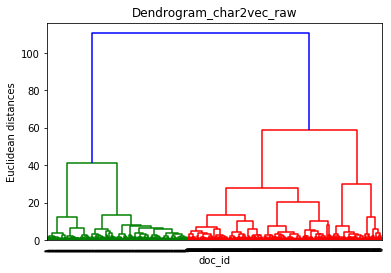

In [3]:
# Plot a dendrogram using the dendrogram() function.
mergings = linkage(X, method='ward', metric='euclidean')
dendrogram(mergings,
           labels=y_raw,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title("Dendrogram_char2vec_raw")
plt.xlabel("doc_id")
plt.ylabel("Euclidean distances")
plt.show()

#### 2, 对带有图像信息的 char2vec_with_glyce.pickle进行聚类

In [4]:
#读取训练好的词向量文件
fin = "./char2vec_with_glyce.pickle"
fp = codecs.open(fin, "rb")
dic = pickle.load(fp)
# X 用于存放所有宋词的doc2vec 
X = []
for i in dic:
        X.append(dic[i]["doc2vec"])
# 将 X 转化成 array类型
X = np.array(X)

#迭代100次 选出分数最高的聚类总数K
max = 0
for j in range(2,100):
    n_clusters = j
    model = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
    y_pred = model.fit_predict(X)    
    # 用calinski_harabasz_score 对聚类结果进行评估
    error = metrics.calinski_harabasz_score(X,y_pred)
    if error > max:
        max = error
        index = j
    print("n_cluster ", j, ":",error)
n_clusters = index
print("optimal K：",index)
print("calinski_harabasz_score:", max )
y_pred = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward').fit_predict(X)
y_glyce = y_pred

n_cluster  2 : 1207.5361063267674
n_cluster  3 : 1633.4514727012145
n_cluster  4 : 1706.6254240300023
n_cluster  5 : 2302.4350692142607
n_cluster  6 : 2125.2459981921047
n_cluster  7 : 2019.0006347625588
n_cluster  8 : 1968.5492152604977
n_cluster  9 : 1873.5283212929196
n_cluster  10 : 1772.5254378913628
n_cluster  11 : 1703.8010807808726
n_cluster  12 : 1660.3214827619204
n_cluster  13 : 1575.879883788409
n_cluster  14 : 1484.825354422348
n_cluster  15 : 1407.368474324957
n_cluster  16 : 1337.9809777047296
n_cluster  17 : 1276.8886289403633
n_cluster  18 : 1220.4841955217885
n_cluster  19 : 1170.481479447816
n_cluster  20 : 1124.818380709316
n_cluster  21 : 1083.7674723313512
n_cluster  22 : 1045.2320505476555
n_cluster  23 : 1008.1369322136397
n_cluster  24 : 974.192643907208
n_cluster  25 : 943.031272038905
n_cluster  26 : 913.8975030272346
n_cluster  27 : 886.7075881042255
n_cluster  28 : 861.5588233619501
n_cluster  29 : 838.3321686876153
n_cluster  30 : 816.4516356758213
n_clust

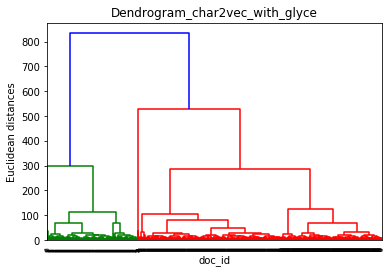

In [5]:
# Plot a dendrogram using the dendrogram() function.
mergings = linkage(X, method='ward', metric='euclidean')
dendrogram(mergings,
           labels=y_glyce,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.title("Dendrogram_char2vec_with_glyce")
plt.xlabel("doc_id")
plt.ylabel("Euclidean distances")
plt.show()

#### 3,对聚类结果（以加图像信息的char2vec_with_glyce.pickle为例）进行可视化（生成json文件在d3中进行可视化）

In [6]:
def main1(data, num):
    """
    实现从data中随机取num个元素，生成一个新的列表
    原因是把聚类的全部结果加进去，文件会很大（可视化不支持）
    """
    return random.sample(data, num)

# position 存放每个类别的元素在宋词的序号
position = {}
num = {}
for key in y_pred:
    num[key] = num.get(key,0) + 1
    position[key] = []
for i in range(len(y_glyce)):
    position[y_glyce[i]].append(i)
    
    
dictionary = {}
dictionary["name"] = "poems"
#dic["children"] 是个列表，列表的数量为聚类后的类别数量，列表中的每个元素为一个类
dictionary["children"] = []

# 对于类别2，3，所含的宋词数量较少不需要随机取样
for n in [2,3]:
    name = "cluster{}".format(n)
    # sub_dic这个字典代表一个类别
    sub_dic = {}
    # 当前第i个类别名字为cluster${i}
    sub_dic["name"] = name
    # sub_dic["children"]为列表，列表长度为当前类别样本数量，列表每个元素为属于这个类别的样本
    sub_dic["children"] = []
    for i in range(len(position[n])):
        if position[n][i] in dic:
            sub_name = "{}".format(dic[position[n][i]]["author"]+ "-" + dic[position[n][i]]["rhythmic"])
            sub_value = i
        # 样本名字为 name${i}，名字为”作者-词牌名“ 
        # value数值不重要，随意给
            sub_dic["children"].append({"name": sub_name, "value": sub_value})
        dictionary["children"].append(sub_dic)

# 对于类别0，1，4，所含的宋词数量较多（全部可视化较困难，所以随即取出每个类别中的100个宋词）        
for n in [0,1,4]:
    name = "cluster{}".format(n)
    # sub_dic这个字典代表一个类别
    sub_dic = {}
    # 当前第i个类别名字为cluster${i}
    sub_dic["name"] = name
    # sub_dic["children"]为列表，列表长度为当前类别样本数量，列表每个元素为属于这个类别的样本
    sub_dic["children"] = []
    cluster_num = []
    cluster_num = main1(position[n],100)
    for i in range(len(cluster_num)):
        if position[n][i] in dic:
            sub_name = "{}".format(dic[position[n][i]]["author"]+ "-" + dic[position[n][i]]["rhythmic"])
            sub_value = i
        # 样本名字为 name${i}，名字为”作者-词牌名“
        # value数值不重要，随意给
            sub_dic["children"].append({"name": sub_name, "value": sub_value})
        dictionary["children"].append(sub_dic)

clusters = dictionary["children"]
s = []
for key in clusters:
    if key not in s:
        s.append(key)
dictionary["children"] = s

fp = codecs.open("poem_hclust.json", "w", encoding = "utf8")
json.dump(dictionary, fp, ensure_ascii = False)
fp.close()


#### 最后在 https://observablehq.com/@d3/cluster-dendrogram 上传生成的poem.json文件进行聚类可视化